In [1]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

%matplotlib inline

In [2]:
#xs = np.array([random.randint(0,9) for i in range(20)], dtype=np.float64)
#ys = np.array([random.randint(0,9) for i in range(20)], dtype=np.float64)

In [20]:
def create_dataset(num_el, variance, step=2, correlation=False):
    val = 1
    ys = []
    
    for i in range(num_el):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    
    xs = [i for i in range(num_el)] #[i[0] for i in enumerate(ys)]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = ((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs))**2 - mean(xs**2))
    b = mean(ys) - (m * mean(xs))  
    return m,b

def squared_error(ys, ys_line):
    return sum((ys_line - ys)**2)

def coeff_of_determination(ys, ys_line):
    y_mean_line = [mean(ys) for y in ys]
    sq_error_regr = squared_error(ys, ys_line)
    sq_error_y_mean = squared_error(ys, y_mean_line)
    
    return 1 - (sq_error_regr / sq_error_y_mean)

In [27]:
xs, ys = create_dataset(40, 10, 2, 'pos')

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m * x) + b for x in xs]

r_squared = coeff_of_determination(ys, regression_line)
print(r_squared)

0.957481428904


In [28]:
predict_x = max(xs) + 10
predict_y = (m*predict_x) + b

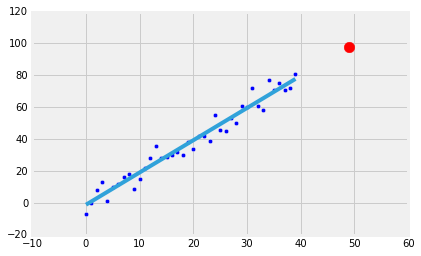

In [29]:
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, s=111, color='r')
plt.plot(xs, regression_line)
plt.show()